CSC3310 — Program #2 — Benchmarking Insertion and Selection Sorts

David Litton and Eleazar Miranda

CSC 3310

Mar 1, 2024

__Summary__: In this notebook the selection sort and insertion sort algorithms will be compared. Our specific implementations are defined below. Following that is a validation cell(s) which check the sorting algorithms work with various input cases. We then benchmark the algorithms against lists of various sizes and whether the list is random, sorted or reversorted (worst case). At the bottom of the notebook there are some graphs comparing the benchmarking and a reflection based on our results.

# Implementation

## Selection Sort

In [1]:
def selectionSort(input_arr):
    n = len(input_arr)
    for i in range(n-1):
        min_index = i
        for j in range(i + 1, n):
            if input_arr[j] < input_arr[min_index]:
                min_index = j
        input_arr[i], input_arr[min_index] = input_arr[min_index], input_arr[i]

    return input_arr
        
        


## Insertion Sort

In [2]:
def insertionSort(input_arr):
    for i in range(1, len(input_arr)):
        key = input_arr[i]
        j = i-1
        while j >= 0 and key < input_arr[j] :
                input_arr[j + 1] = input_arr[j]
                j -= 1
        input_arr[j + 1] = key
    
    return input_arr

# Validation and Verification

In [3]:
sample_1 = [5, 3, 4, 2, 1]
sample_2 = [1, 2, 3, 4, 5]
sample_3 = [1, 1, 1, 1, 1]
sample_4 = [5, 1, 1, 1, 1]

output_1 = [1, 2, 3, 4, 5]
output_2 = [1, 2, 3, 4, 5]
output_3 = [1, 1, 1, 1, 1]
output_4 = [1, 1, 1, 1, 5]

all_sample_test_sets = [sample_1, sample_2, sample_3, sample_4]
all_expected_outputs = [output_1, output_2, output_3, output_4]

num_tests = 4

In [4]:
def validation_test():
    for test_num in range(0, num_tests):
        print("Testing using sample_" + str(test_num + 1))
        print(" - input:  " + str(all_sample_test_sets[test_num]))
        print(" - output: " + str(all_expected_outputs[test_num]))
        
        selection_out = selectionSort(all_sample_test_sets[test_num])
        insertion_out = insertionSort(all_sample_test_sets[test_num])
        
        
        output_message = ""
        error_msg = "Invalid output:\n"
        if (selection_out == all_expected_outputs[test_num]):
            output_message += "selection sort: PASSED | "
        else:
            output_message += "selection sort: FAILED | "
            error_msg += "selection sort: " + str(selection_out) + "\n"
            
        if (insertion_out == all_expected_outputs[test_num]):
            output_message += "insertion sort: PASSED"
        else:
            output_message += "insertion sort: FAILED"
            error_msg += "insertion sort: " + str(selection_out)
            
        print(output_message)
        print(error_msg + "\n")

In [5]:
validation_test()

Testing using sample_1
 - input:  [5, 3, 4, 2, 1]
 - output: [1, 2, 3, 4, 5]
selection sort: PASSED | insertion sort: PASSED
Invalid output:


Testing using sample_2
 - input:  [1, 2, 3, 4, 5]
 - output: [1, 2, 3, 4, 5]
selection sort: PASSED | insertion sort: PASSED
Invalid output:


Testing using sample_3
 - input:  [1, 1, 1, 1, 1]
 - output: [1, 1, 1, 1, 1]
selection sort: PASSED | insertion sort: PASSED
Invalid output:


Testing using sample_4
 - input:  [5, 1, 1, 1, 1]
 - output: [1, 1, 1, 1, 5]
selection sort: PASSED | insertion sort: PASSED
Invalid output:




# Benchmarking

In [6]:
import time
import copy

def benchmark(sorting_algorithm, input_list):
 
    original_list = copy.deepcopy(input_list)  # Make a separate copy for each trial
    start_time = time.perf_counter()

    # Benchmark loop
    for _ in range(10):  # Run it 10 times to get an average
        sorting_algorithm(copy.deepcopy(original_list))

    end_time = time.perf_counter()
    elapsed_time = end_time - start_time # The total time of 100 runs
    avg_time = elapsed_time / 10

    print ("Average time to complete " + sorting_algorithm.__name__  + 
           " " + str(avg_time) + " seconds for a list of size: " + str(len(input_list)))
    
    return avg_time
   



In [7]:
import random

# Generating a list of 100 random numbers
list_10_rand = [random.randint(1, 1000) for _ in range(10)]
list_100_rand =  [random.randint(1, 1000) for _ in range(100)]
list_1000_rand =  [random.randint(1, 1000) for _ in range(1000)]
list_10000_rand = [random.randint(1, 1000) for _ in range(10000)]
list_20000_rand = [random.randint(1, 1000) for _ in range(20000)]
list_10_reverse = sorted(range(10), reverse=True)
list_100_reverse = sorted(range(100), reverse=True)
list_1000_reverse  = sorted(range(1000), reverse=True)
list_10000_reverse  = sorted(range(10000), reverse=True)
list_20000_reverse  = sorted(range(20000), reverse=True)
list_10_sorted = sorted(range(10))
list_100_sorted = sorted(range(100))
list_1000_sorted  = sorted(range(1000))
list_10000_sorted  = sorted(range(10000))
list_20000_sorted  = sorted(range(20000))






In [8]:
# Random SOrted List (average case)
avg_selectionSort_list = []
avg_selectionSort_list.append(benchmark(selectionSort,list_10_rand))
avg_selectionSort_list.append(benchmark(selectionSort,list_100_rand))
avg_selectionSort_list.append(benchmark(selectionSort,list_1000_rand))
avg_selectionSort_list.append(benchmark(selectionSort,list_10000_rand))
avg_selectionSort_list.append(benchmark(selectionSort,list_20000_rand))

avg_insertionSort_list = []
avg_insertionSort_list.append(benchmark(insertionSort,list_10_rand))
avg_insertionSort_list.append(benchmark(insertionSort,list_100_rand))
avg_insertionSort_list.append(benchmark(insertionSort,list_1000_rand))
avg_insertionSort_list.append(benchmark(insertionSort,list_10000_rand))
avg_insertionSort_list.append(benchmark(insertionSort,list_20000_rand))

Average time to complete selectionSort 1.230000052601099e-05 seconds for a list of size: 10
Average time to complete selectionSort 0.00031457000004593284 seconds for a list of size: 100
Average time to complete selectionSort 0.029604440000548495 seconds for a list of size: 1000
Average time to complete selectionSort 5.187903219999862 seconds for a list of size: 10000
Average time to complete selectionSort 15.038140480000584 seconds for a list of size: 20000
Average time to complete insertionSort 1.2589999823831021e-05 seconds for a list of size: 10
Average time to complete insertionSort 0.00030974999972386283 seconds for a list of size: 100
Average time to complete insertionSort 0.03638502999965567 seconds for a list of size: 1000
Average time to complete insertionSort 3.7699142199999187 seconds for a list of size: 10000
Average time to complete insertionSort 15.733618350001052 seconds for a list of size: 20000


In [9]:
# Random Reverse List (worst case)
worst_selectionSort_list = []
worst_selectionSort_list.append(benchmark(selectionSort,list_10_reverse))
worst_selectionSort_list.append(benchmark(selectionSort,list_100_reverse))
worst_selectionSort_list.append(benchmark(selectionSort,list_1000_reverse))
worst_selectionSort_list.append(benchmark(selectionSort,list_10000_reverse))
worst_selectionSort_list.append(benchmark(selectionSort,list_20000_reverse))

worst_insertionSort_list = []
worst_insertionSort_list.append(benchmark(insertionSort,list_10_reverse))
worst_insertionSort_list.append(benchmark(insertionSort,list_100_reverse))
worst_insertionSort_list.append(benchmark(insertionSort,list_1000_reverse))
worst_insertionSort_list.append(benchmark(insertionSort,list_10000_reverse))
worst_insertionSort_list.append(benchmark(insertionSort,list_20000_reverse))

Average time to complete selectionSort 2.1509999351110308e-05 seconds for a list of size: 10
Average time to complete selectionSort 0.0004908200004138053 seconds for a list of size: 100
Average time to complete selectionSort 0.044455200000084 seconds for a list of size: 1000
Average time to complete selectionSort 4.023039709999284 seconds for a list of size: 10000
Average time to complete selectionSort 16.510138779999398 seconds for a list of size: 20000
Average time to complete insertionSort 1.5130000247154384e-05 seconds for a list of size: 10
Average time to complete insertionSort 0.0006451500012190081 seconds for a list of size: 100
Average time to complete insertionSort 0.06926166000048398 seconds for a list of size: 1000
Average time to complete insertionSort 7.510306910000509 seconds for a list of size: 10000
Average time to complete insertionSort 30.666720470000293 seconds for a list of size: 20000


In [10]:
#Already sorted lists (best case)
best_selectionSort_list = []
best_selectionSort_list.append(benchmark(selectionSort,list_10_sorted))
best_selectionSort_list.append(benchmark(selectionSort,list_100_sorted))
best_selectionSort_list.append(benchmark(selectionSort,list_1000_sorted))
best_selectionSort_list.append(benchmark(selectionSort,list_10000_sorted))
best_selectionSort_list.append(benchmark(selectionSort,list_20000_sorted))

best_insertionSort_list = []
best_insertionSort_list.append(benchmark(insertionSort,list_10_sorted))
best_insertionSort_list.append(benchmark(insertionSort,list_100_sorted))
best_insertionSort_list.append(benchmark(insertionSort,list_1000_sorted))
best_insertionSort_list.append(benchmark(insertionSort,list_10000_sorted))
best_insertionSort_list.append(benchmark(insertionSort,list_20000_sorted))

Average time to complete selectionSort 1.2409999908413737e-05 seconds for a list of size: 10
Average time to complete selectionSort 0.0004022399996756576 seconds for a list of size: 100
Average time to complete selectionSort 0.04395331999985501 seconds for a list of size: 1000
Average time to complete selectionSort 3.967805020000378 seconds for a list of size: 10000
Average time to complete selectionSort 15.169000930000038 seconds for a list of size: 20000
Average time to complete insertionSort 9.639999188948422e-06 seconds for a list of size: 10
Average time to complete insertionSort 6.481000018538907e-05 seconds for a list of size: 100
Average time to complete insertionSort 0.0006543699986650608 seconds for a list of size: 1000
Average time to complete insertionSort 0.00647093000006862 seconds for a list of size: 10000
Average time to complete insertionSort 0.013346750001073816 seconds for a list of size: 20000


# Analysis

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

list_sizes = [10, 100, 1000, 10000, 20000]

print("Insertion worst slope: " + str(linregress(np.log(list_sizes), 
                                                 np.log(worst_insertionSort_list))[0]))
print("Insertion average slope: " + str(linregress(np.log(list_sizes), 
                                                   np.log(avg_insertionSort_list))[0]))
print("Insertion best slope: " + str(linregress(np.log(list_sizes), 
                                                np.log(best_insertionSort_list))[0]))
print("Selection worst slope: " + str(linregress(np.log(list_sizes), 
                                                 np.log(worst_selectionSort_list))[0]))
print("Selection average slope: " + str(linregress(np.log(list_sizes), 
                                                   np.log(avg_selectionSort_list))[0]))
print("Selection best slope: " + str(linregress(np.log(list_sizes), 
                                                np.log(best_selectionSort_list))[0]))

Insertion worst slope: 1.9340234507050573
Insertion average slope: 1.8846110037886037
Insertion best slope: 0.9601517367098416
Selection worst slope: 1.814801561709505
Selection average slope: 1.9017659893328434
Selection best slope: 1.875124734500371


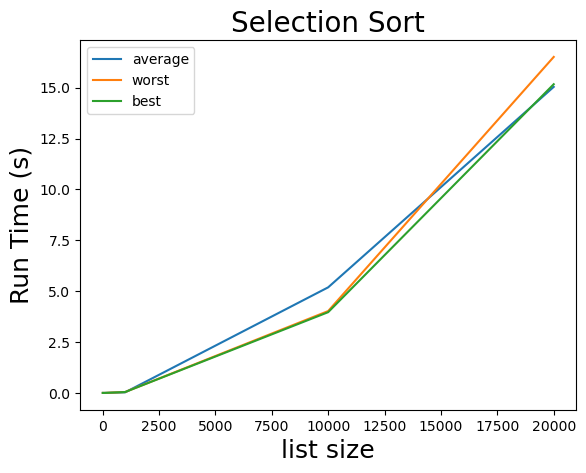

In [12]:
# plot all selection sort
plt.plot(list_sizes, avg_selectionSort_list, label="average")
plt.plot(list_sizes, worst_selectionSort_list, label="worst")
plt.plot(list_sizes, best_selectionSort_list, label="best")
plt.xlabel("list size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Selection Sort", fontsize=20)
plt.legend()


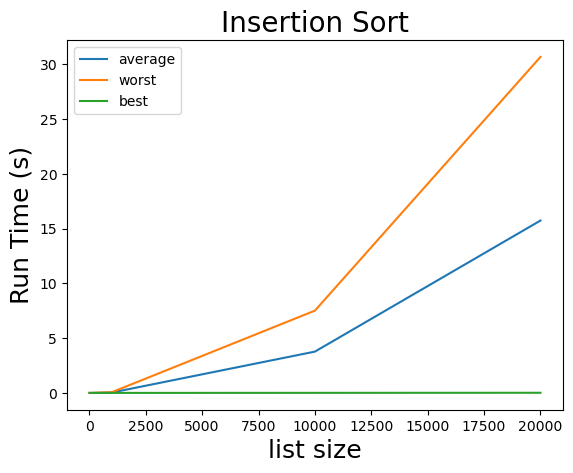

In [13]:
# plot all insertion sort
plt.plot(list_sizes, avg_insertionSort_list, label="average")
plt.plot(list_sizes, worst_insertionSort_list, label="worst")
plt.plot(list_sizes, best_insertionSort_list, label="best")
plt.xlabel("list size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Insertion Sort", fontsize=20)
plt.legend()

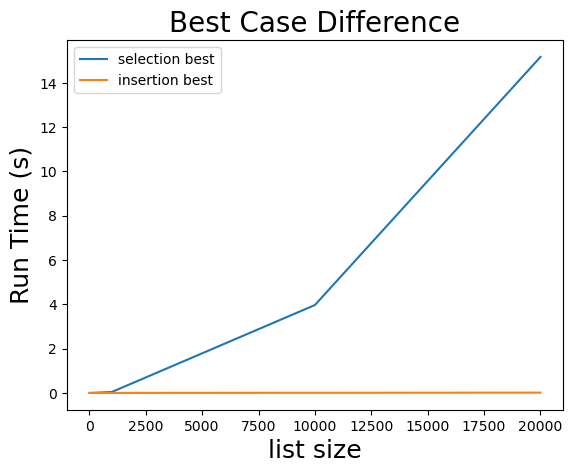

In [14]:
# plot best
plt.plot(list_sizes, best_selectionSort_list, label="selection best")
plt.plot(list_sizes, best_insertionSort_list, label="insertion best")
plt.xlabel("list size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Best Case Difference", fontsize=20)
plt.legend()

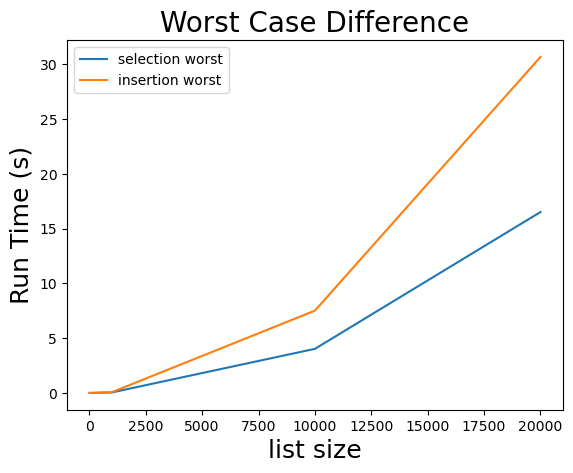

In [15]:
# plot worst
plt.plot(list_sizes, worst_selectionSort_list, label="selection worst")
plt.plot(list_sizes, worst_insertionSort_list, label="insertion worst")
plt.xlabel("list size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Worst Case Difference", fontsize=20)
plt.legend()

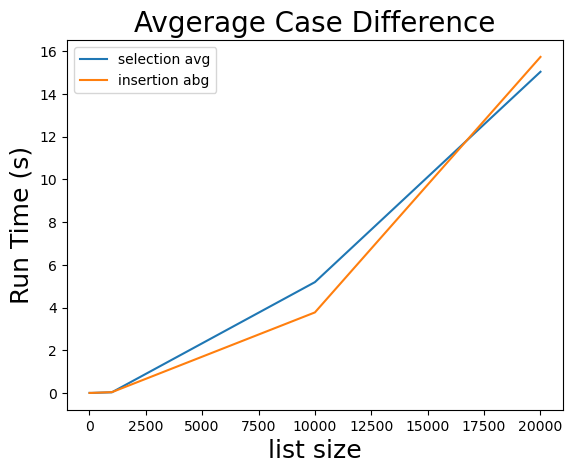

In [16]:
# plot average
plt.plot(list_sizes, avg_selectionSort_list, label="selection avg")
plt.plot(list_sizes, avg_insertionSort_list, label="insertion abg")
plt.xlabel("list size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Avgerage Case Difference", fontsize=20)
plt.legend()

# Reflection

- Create a table of the theoretical and estimated run time functions for the 6 combinations (2 algorithms, 3 cases). Do your estimates match the theory? If not, you may have made a mistake somewhere.

Combination | Run Time
------------|---------
Selection Worst   | Between Linear and Quadratic
Selection Average | Between Linear and Quadratic
Selection Best    | Between Linear and Quadratic
Insertion Worst   | Between Linear and Quadratic
Insertion Average | Between Linear and Quadratic
Insertion Best    | Sub-Linear

- Which algorithm had a better run time than the other and for which case(s)? Why do you think that one case was substantially faster for that algorithm? (Hint: focus on the inner loops.)

Case | Best Algorithm
-----|---------------
Worst   | Selection Sort
Average | Insertion Sort (close but insertion sort had the lower regression analysis)
Best    | Insertion Sort

Insertion sort is so much faster for an already sorted list as it checks if j-1 > j (if j-1 and j are not sorted) if they are sorted (in this case they are) is skips the inner loop.

- Based on your results, which of the two sorting algorithms would you use in practice? Why?

I would most likely use insertion sort. Insertion osrt was better in the average case and signifficantly better when lists will be sorted or more likely to be closely sorted. Additionaly I feel the algorithm is easier to implement.